
# Gold Price Prediction

The **Gold Price Prediction** typically refers to a project aimed at developing a model or system that can forecast the future prices of gold.

-------------------------

**The dataset contains the following variables:**

* **'1.	Date':** This variable represents the timestamp or date of the data entry. It's not usually considered a predictor in the modeling process, but it's essential for organizing and sorting our data. 

* **'2.	SPX':** This likely represents the Standard & Poor's 500 index, which is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. It can be considered as a proxy for overall market sentiment or the health of the economy. 

* **'3.	GLD':** This is likely the price of gold, which is our target variable. In predictive modeling, the target variable (or dependent variable) is the one you're trying to predict. In this case, it's the variable you want our model to predict: the future price of gold. 

* **'4.	USO':** This could represent the United States Oil Fund, which tracks the price movements of West Texas Intermediate (WTI) light, sweet crude oil. Oil prices can have an impact on gold prices due to various economic factors, so including this variable could provide additional information for our model. 

* **'5.	SLV':** This likely represents the iShares Silver Trust, an exchange-traded fund (ETF) that tracks the price of silver. Silver prices, like gold prices, can be influenced by similar economic factors, so including this variable could also be informative for our model. 

* **'6.	EUR/USD':** IThis represents the exchange rate between the Euro and the US Dollar. Exchange rates can influence the price of gold, as they reflect the relative strength of currencies and can impact investor sentiment and demand for gold as a hedge against currency fluctuations. 

------------------

# Importing  Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

---------------------

# Data Prepocessing
## Data reading

In [3]:
df = pd.read_csv('dataset/gld_price_data.csv')

### read top 5

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/08,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/08,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/08,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/08,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/08,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.shape

(2290, 6)

In [7]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

-----------------------------

## Data Cleaning

### Checking missing values

In [8]:
print(df.isnull().sum())

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


------------------------------

### Handling if missing values exists

In [9]:
df.dropna(inplace=True)

---------------------

### Checking duplicate values

In [10]:
df.duplicated().sum()

0

-------------------------

### Handling duplicate values if exists

In [11]:
df = df.drop_duplicates()

In [12]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

------------------------

### Checking Outlier if exist

In [21]:
# Define a function to detect outliers based on the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Columns to check for outliers
columns_to_check = ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

# Calculate the number of outliers in each column
outliers_count = {column: detect_outliers_iqr(df, column) for column in columns_to_check}
outliers_count


{'SPX': 0, 'GLD': 0, 'USO': 113, 'SLV': 0, 'EUR/USD': 0}

-------------------------

### Handling outliers by droping permenentally

In [32]:
# Define a function to remove outliers based on the IQR method for a given column
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal for each column individually
df = df.copy()
for column in columns_to_check:
    df = remove_outliers_iqr(df, column)

# Check the new shape of the dataset to see how many records remain
df.shape

(1078, 6)

--------------------------------

### Describtive Statistics

In [33]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000
mean,2126.537579,119.211154,19.490803,16.751711,1.191099
std,281.263113,7.000241,10.725019,2.047215,0.107654
min,1573.089966,101.250000,7.960000,13.060000,1.039047
25%,1938.817505,115.152502,10.900000,15.410000,1.103114
50%,2080.250000,119.820000,13.675000,16.175000,1.147296
75%,2298.132568,124.589996,33.562500,18.592500,1.287959
max,2802.560059,136.699997,39.290001,21.980000,1.393088


-----------------------------

# Data Visualizations

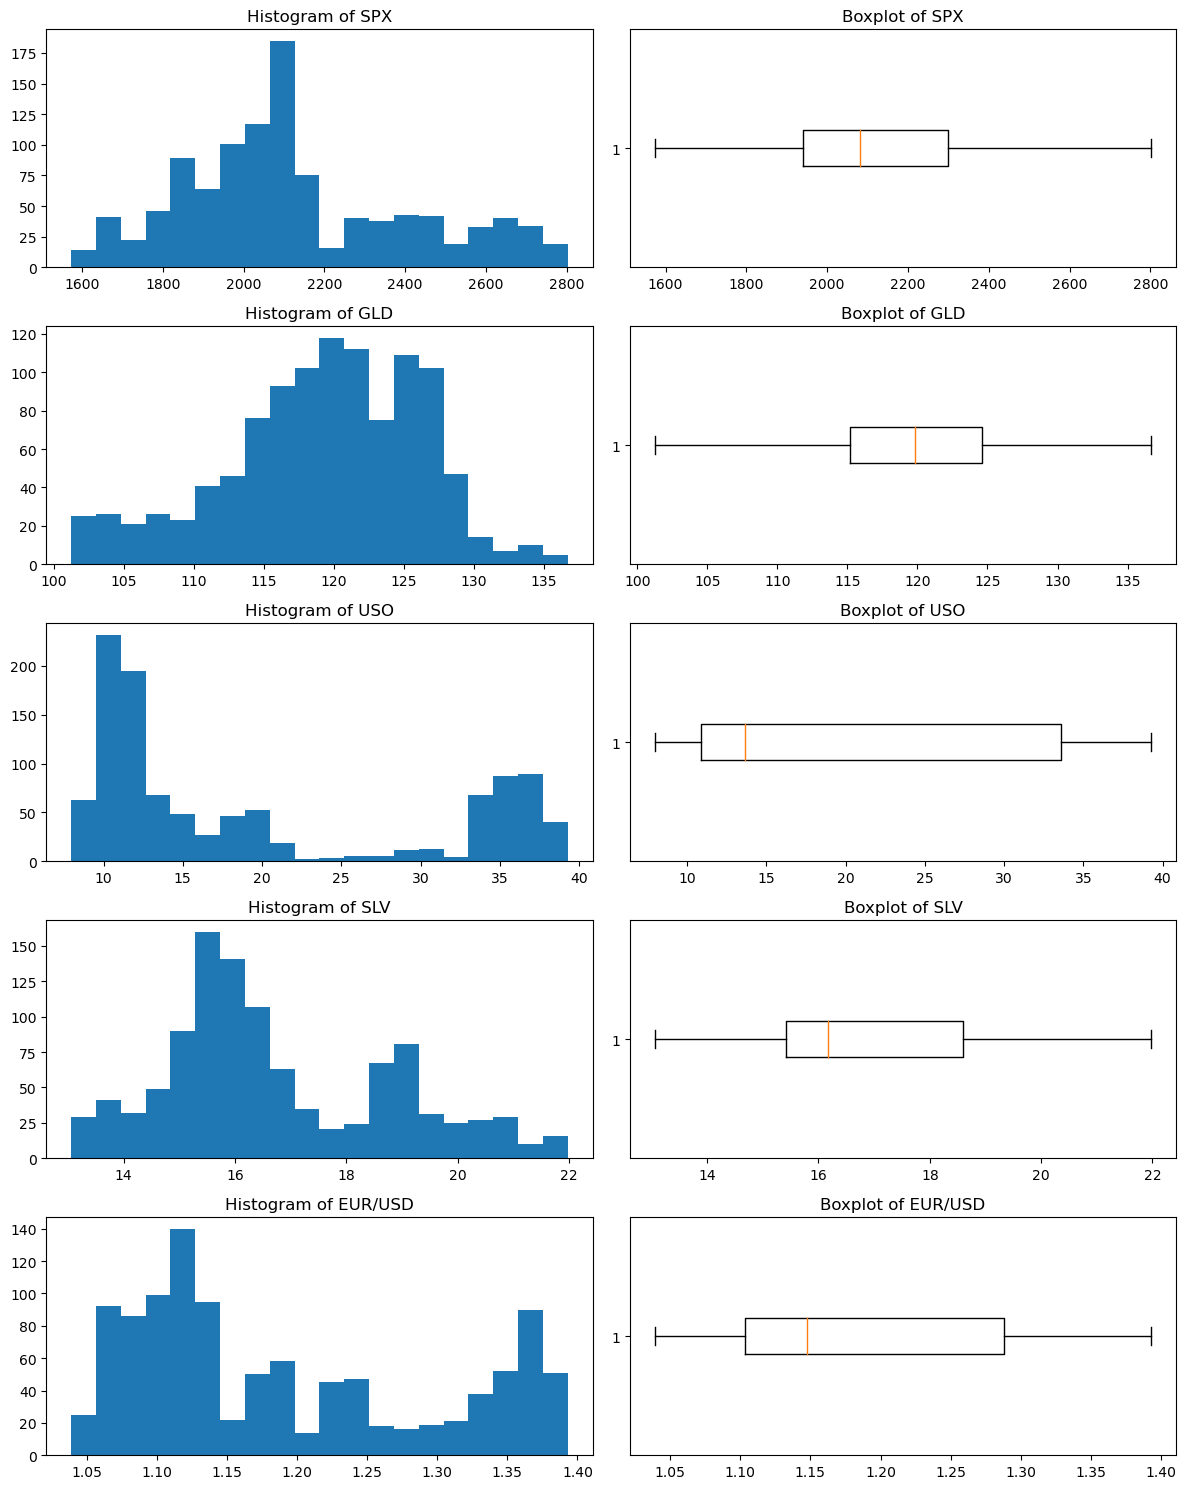

In [36]:
# Define colors for the histograms
colors = ['skyblue', 'gray', 'salmon', 'purple', 'orange', 'blue']
numerical_columns = ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']
# Set up the matplotlib figure with specified dimensions
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 3 * len(numerical_columns)))

# Loop through each numerical column to create both a histogram and a boxplot
for i, col in enumerate(numerical_columns):
    # Histogram
    axes[i, 0].hist(df[col], bins=20)
    axes[i, 0].set_title(f'Histogram of {col}')
    
    # Boxplot
    axes[i, 1].boxplot(df[col], vert=False, patch_artist=False, boxprops=dict())
    axes[i, 1].set_title(f'Boxplot of {col}')
    
# Adjust layout for readability
plt.tight_layout()
plt.show()

----------------------------------

### Correlation of numerical data visualization

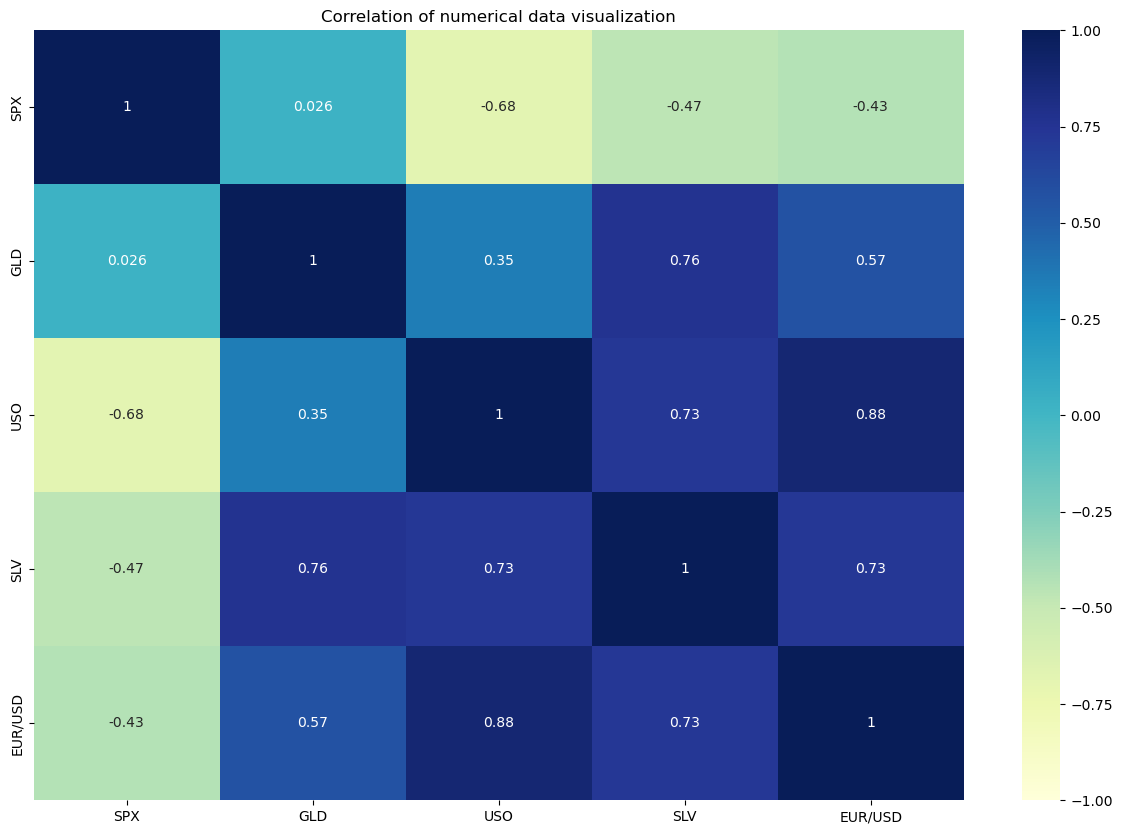

In [77]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Plot correlation heatmap for numeric columns
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title('Correlation of numerical data visualization')
plt.savefig('correlation.png')  # Save the image
plt.show()

# Drop unwanted Column (Date)
-Bacause this column represents the timestamp or date of the data entry. It's not usually considered a predictor in the modeling process, but it's essential for organizing and sorting our data.

In [40]:
df.drop(columns=['Date'], inplace=True)

----------------------------------------

### Check if Date column is droped

In [41]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

----------------------------------------------------

# Building Machine Learning Models

### Separate features (X) and target variable (y)

In [42]:
# Splitting features and target
X = df.drop('GLD', axis=1)  # Features excluding 'GLD'
y = df['GLD']  # Target variable, 'GLD' mean Gold

### Train Test Split

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 1. Linear Regression Model

In [44]:
lin_reg_model = LinearRegression()

### Train the model on the training set

In [45]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [46]:
print("Linear Score Average Trained: ", lin_reg_model.score(X_train, y_train))

Linear Score Average Trained:  0.8215668117207794


In [47]:
print("Linear Score Average Tested: ", lin_reg_model.score(X_test, y_test))

Linear Score Average Tested:  0.8527259159158115


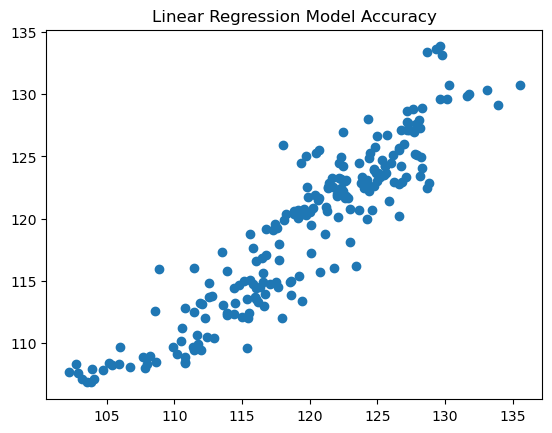

In [72]:
predictions = lin_reg_model.predict(X_test)
plt.title('Linear Regression Model Accuracy')
plt.scatter(y_test,predictions)
plt.savefig('lin_reg.png')  # Save the image

----------------------------------------------------------

## 2. Decision Regression Model

In [50]:
dec_reg_model = DecisionTreeRegressor()

In [51]:
dec_reg_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [52]:
print("Decision tree Score Average Trained: ", dec_reg_model.score(X_train, y_train))

Decision tree Score Average Trained:  1.0


In [54]:
print("Decision tree Score Average Tested: ", dec_reg_model.score(X_test, y_test))

Decision tree Score Average Tested:  0.9625893824205983


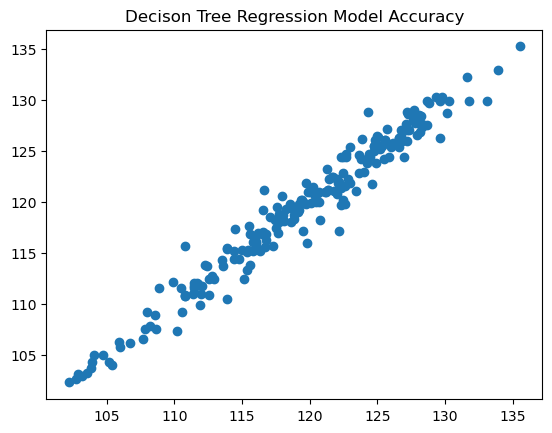

In [73]:
predictions = dec_reg_model.predict(X_test)
plt.title('Decison Tree Regression Model Accuracy')
plt.scatter(y_test,predictions)
plt.savefig('dec_reg.png')  # Save the image

------------------------------------------

## 3. Random Forest Regression Model

In [56]:
ran_reg_model = RandomForestRegressor()

In [57]:
ran_reg_model.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
print("Random ForestScore Average Trained: ", ran_reg_model.score(X_train, y_train))

Random ForestScore Average Trained:  0.995850274387127


In [62]:
print("Random ForestScore Average Tested: ", ran_reg_model.score(X_test, y_test))

Random ForestScore Average Tested:  0.9775187024963048


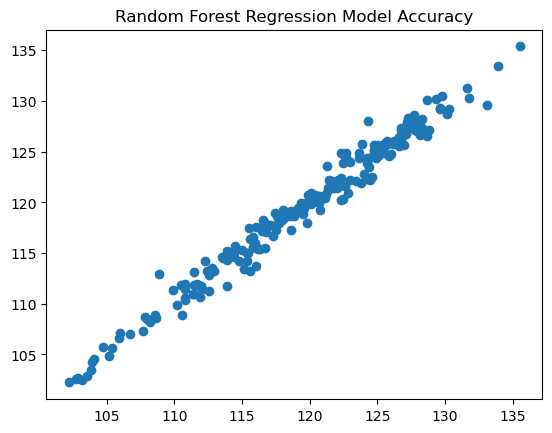

In [74]:
predictions = ran_reg_model.predict(X_test)
plt.title('Random Forest Regression Model Accuracy')
plt.scatter(y_test,predictions)
plt.savefig('ran_reg.png')  # Save the image

-------------------------------------

## 4. KNN Regression Model

In [64]:
knn_reg_model = KNeighborsRegressor()

In [65]:
knn_reg_model.fit(X_train, y_train)

KNeighborsRegressor()

In [66]:
print("Knn Score Average Trained: ", knn_reg_model.score(X_train, y_train))

Knn Score Average Trained:  0.8012041295693424


In [67]:
print("Knn Score Average Tested: ", knn_reg_model.score(X_test, y_test))

Knn Score Average Tested:  0.7072980157521026


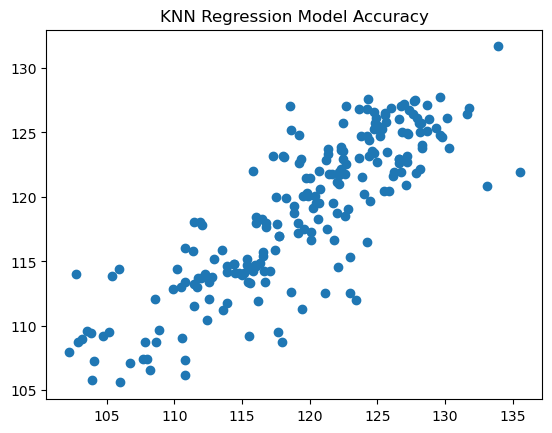

In [75]:
predictions = knn_reg_model.predict(X_test)
plt.title('KNN Regression Model Accuracy')
plt.scatter(y_test,predictions)
plt.savefig('knn_reg.png')  # Save the image

---------------

In [69]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
1182,1658.780029,134.630005,33.610001,21.760000,1.288245
1183,1650.469971,134.089996,33.869999,21.950001,1.288328
1185,1669.160034,132.880005,34.110001,21.620001,1.291906
1186,1655.349976,131.940002,33.459999,21.510000,1.284208
1187,1650.510010,134.610001,33.540001,21.879999,1.292507


--------------------

## Feature Testing

In [70]:
# Features
feature_test = np.array([[1447.160034, 78.470001, 15.180, 1.471692]])
result = ran_reg_model.predict(feature_test)

print('The Predicted Gold Price Is: ', result)
print()

The Predicted Gold Price Is:  [112.84249928]



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


--------------------------------------

## Model Selection & Deployment
we selected Random Forest Regression Model for 99% (training), and 98% (Testing)!.

In [101]:
from joblib import dump

# Save random forest Regression model
dump(ran_reg_model, 'model/random_forest_regression_model.joblib')
print("Successfuly Saved or deployed")


Successfuly Saved or deployed


In [51]:
import joblib

# Save the model
joblib.dump(ran_reg_model, 'model/random_forest_regressor_model.pkl')


['model/random_forest_regressor_model.pkl']

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor object
rf_reg = RandomForestRegressor()

# Set monotonic constraints (incorrect usage)
rf_reg.monotonic_cst = [-1, 1, 1, -1]


In [58]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
tree_reg = DecisionTreeRegressor()

# Remove the incorrect reference to 'monotonic_cst'
# tree_reg.monotonic_cst = [-1, 1, 1, -1]


--------------------------------------------

# End Project - Thanks to Allah